

```
# This is formatted as code
```

From the dataset we're using and also we are essentially trying to predict a person's actual weight based on several health and fitness-related features. Here's what we're trying to do in simple terms:

Input features: we're using various factors like the type of exercise, calories burned, the person’s dream weight, their age, gender, exercise duration, heart rate, BMI, weather conditions, and exercise intensity to train the model. These factors provide information about a person's fitness habits and physical conditions.

Target variable: The goal is to predict Actual Weight based on these input features.









In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor



In [7]:
df = pd.read_csv('exercise_dataset.csv')

In [8]:
df.head()

,ID,Exercise,Calories Burn,Dream Weight,Actual Weight,Age,Gender,Duration,Heart Rate,BMI,Weather Conditions,Exercise Intensity
0,1,Exercise 2,286.959851,91.892531,96.301115,45,Male,37,170,29.426275,Rainy,5
1,2,Exercise 7,343.453036,64.165097,61.104668,25,Male,43,142,21.286346,Rainy,5
2,3,Exercise 4,261.223465,70.846224,71.766724,20,Male,20,148,27.899592,Cloudy,4
3,4,Exercise 5,127.183858,79.477008,82.984456,33,Male,39,170,33.729552,Sunny,10
4,5,Exercise 10,416.318374,89.960226,85.643174,29,Female,34,118,23.286113,Cloudy,3


In [9]:
df.shape

(3864, 12)

In [10]:
#exercise 1-> dieting
#exercise 2-> running
#exercise 3-> cycling
#exercise 4-> swimming
#exercise 5-> yoga
#exercise 6-> dancing
#exercise 7-> jumping rope
#exercise 8-> boxing
#exercise 9-> martial arts
#exercise 10-> push ups

In [11]:
df.drop('ID',axis=1,inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3864 entries, 0 to 3863
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Exercise            3864 non-null   object 
 1   Calories Burn       3864 non-null   float64
 2   Dream Weight        3864 non-null   float64
 3   Actual Weight       3864 non-null   float64
 4   Age                 3864 non-null   int64  
 5   Gender              3864 non-null   object 
 6   Duration            3864 non-null   int64  
 7   Heart Rate          3864 non-null   int64  
 8   BMI                 3864 non-null   float64
 9   Weather Conditions  3864 non-null   object 
 10  Exercise Intensity  3864 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 332.2+ KB


In [13]:
df.describe()

,Calories Burn,Dream Weight,Actual Weight,Age,Duration,Heart Rate,BMI,Exercise Intensity
count,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000
mean,301.861806,75.139263,75.188440,39.621118,40.190994,139.777950,26.801977,5.457298
std,115.828604,14.545824,14.845511,12.521721,11.765957,23.447528,4.746745,2.850896
min,100.009403,50.001984,45.783747,18.000000,20.000000,100.000000,18.500014,1.000000
25%,202.168837,62.373585,62.476906,29.000000,30.000000,119.000000,22.686774,3.000000
50%,299.742508,75.522136,75.544407,40.000000,40.000000,140.000000,26.861656,5.000000
75%,404.143688,87.707989,88.105767,51.000000,51.000000,160.000000,30.950380,8.000000
max,499.859262,99.985355,104.309600,60.000000,60.000000,180.000000,34.996639,10.000000


In [14]:
df['Exercise'].unique()

array(['Exercise 2', 'Exercise 7', 'Exercise 4', 'Exercise 5',
       'Exercise 10', 'Exercise 1', 'Exercise 9', 'Exercise 8',
       'Exercise 6', 'Exercise 3'], dtype=object)

In [15]:
df.isnull().sum()

,0
Exercise,0
Calories Burn,0
Dream Weight,0
Actual Weight,0
Age,0
Gender,0
Duration,0
Heart Rate,0
BMI,0
Weather Conditions,0


In [16]:
df.rename(columns={'Weather Conditions':'Weather'},inplace=True)

In [17]:
df.head()

,Exercise,Calories Burn,Dream Weight,Actual Weight,Age,Gender,Duration,Heart Rate,BMI,Weather,Exercise Intensity
0,Exercise 2,286.959851,91.892531,96.301115,45,Male,37,170,29.426275,Rainy,5
1,Exercise 7,343.453036,64.165097,61.104668,25,Male,43,142,21.286346,Rainy,5
2,Exercise 4,261.223465,70.846224,71.766724,20,Male,20,148,27.899592,Cloudy,4
3,Exercise 5,127.183858,79.477008,82.984456,33,Male,39,170,33.729552,Sunny,10
4,Exercise 10,416.318374,89.960226,85.643174,29,Female,34,118,23.286113,Cloudy,3


In [18]:
df['Exercise'].value_counts()

,count
Exercise,
Exercise 5,404
Exercise 1,403
Exercise 10,398
Exercise 8,397
Exercise 9,394
Exercise 7,386
Exercise 3,385
Exercise 6,381
Exercise 4,371


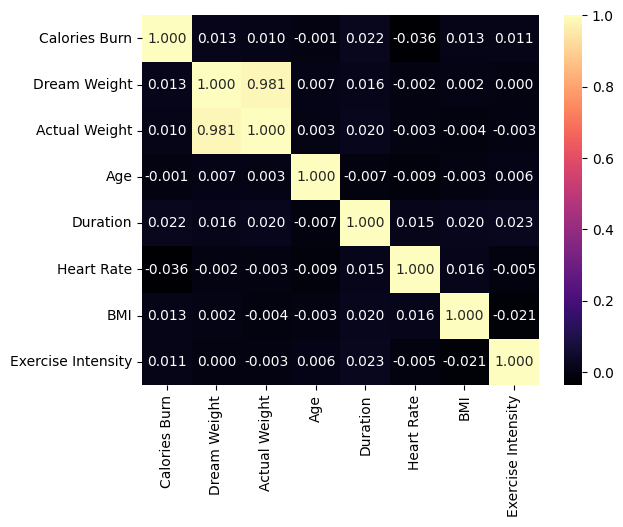

In [19]:
#selecting the columns in the dataset which columns is having the integer or floating values.
df_numeric = df.select_dtypes(include=[np.number])

# Plot the heatmap using only the numeric data
sns.heatmap(df_numeric.corr(), cmap='magma', annot=True, fmt='.3f')
plt.show() #we calculated correlation about df's informations and colorizied it with seaborn.

In [20]:
#it return the indexes for the rows from a dataset.
np.where(df['Age']==20)

(array([   2,   35,   65,  178,  233,  321,  347,  415,  427,  429,  484,
         494,  501,  532,  593,  663,  673,  677,  742,  760,  787,  812,
         843,  853,  883,  934,  953,  965,  987, 1018, 1021, 1048, 1081,
        1082, 1109, 1114, 1270, 1493, 1533, 1557, 1592, 1604, 1608, 1616,
        1626, 1737, 1786, 1799, 1951, 2018, 2041, 2119, 2140, 2154, 2160,
        2188, 2217, 2227, 2291, 2319, 2321, 2324, 2353, 2368, 2371, 2412,
        2425, 2439, 2500, 2698, 2708, 2776, 2834, 2836, 2850, 2860, 2907,
        2910, 3170, 3411, 3444, 3469, 3502, 3647, 3670, 3719, 3749, 3801,
        3853, 3859]),)

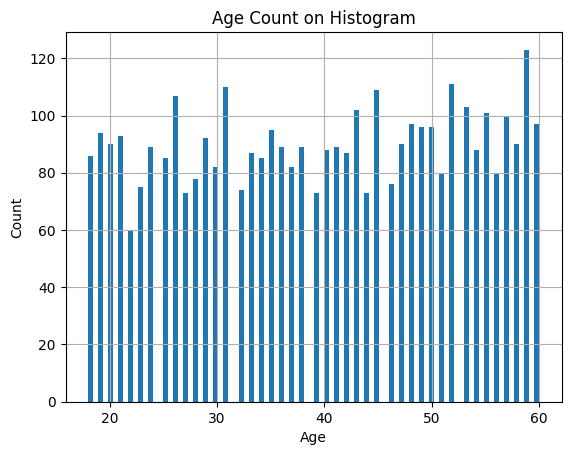

In [21]:
df['Age'].hist(bins=90)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Count on Histogram')
plt.show()

In this histogram graph, we compare the counts of ages.

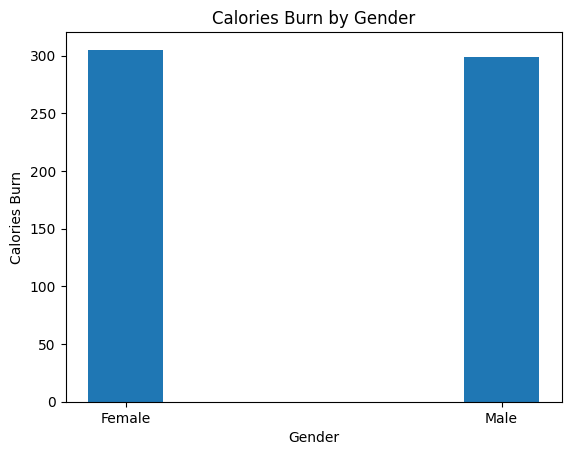

In [22]:
df_numeric = df.select_dtypes(include=[np.number])

# Group by 'Gender' and calculate the mean for numeric columns only
df_grouped = df_numeric.groupby(df['Gender']).mean()

# Plot the result
plt.bar(df_grouped.index, df_grouped['Calories Burn'], width=0.2)
plt.xlabel('Gender')
plt.ylabel('Calories Burn')
plt.title('Calories Burn by Gender')
plt.show()

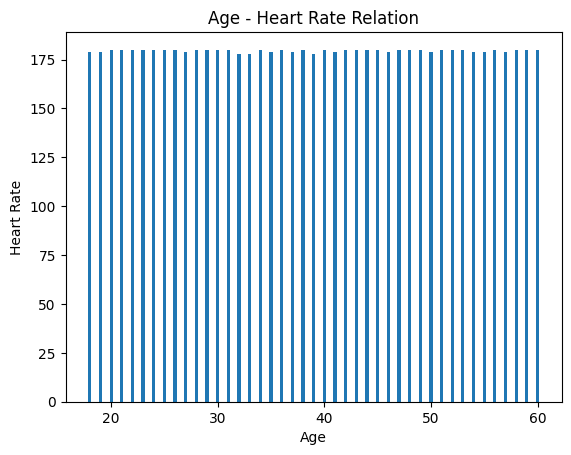

In [23]:
plt.bar(df['Age'],df['Heart Rate'],width=0.3)
plt.xlabel('Age')
plt.ylabel('Heart Rate')
plt.title('Age - Heart Rate Relation')
plt.show()

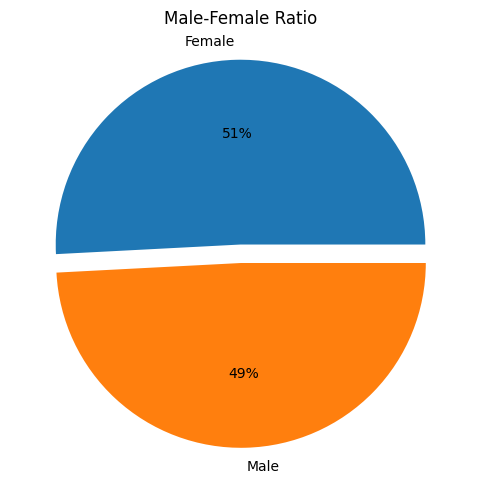

In [24]:
plt.figure(figsize=(12,6))
plt.pie(df["Gender"].value_counts().values,labels=df["Gender"].value_counts().index,autopct="%1.0f%%",explode=(0.1,0))
plt.title("Male-Female Ratio")
plt.show()

In this DF, female subjects are majority.

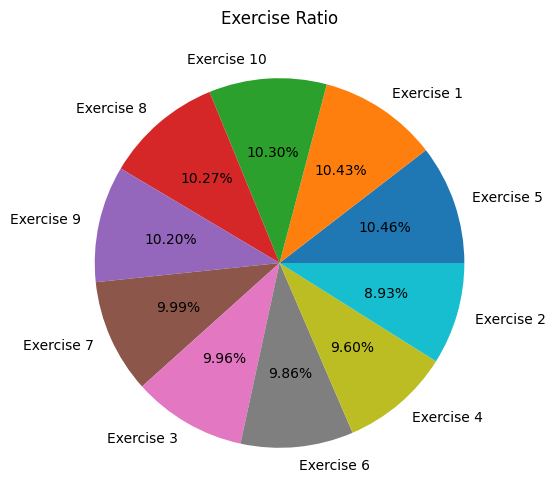

In [25]:
plt.figure(figsize=(12,6))
plt.pie(df["Exercise"].value_counts().values,labels=df["Exercise"].value_counts().index,autopct="%.02f%%")
plt.title("Exercise Ratio")
plt.show()

In [26]:
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.groupby(by='Age').mean().head()

,Calories Burn,Dream Weight,Actual Weight,Duration,Heart Rate,BMI,Exercise Intensity
Age,,,,,,,
18,295.008797,74.278790,74.638901,38.069767,135.988372,27.757458,5.186047
19,313.298650,73.198034,72.847620,42.478723,143.223404,27.020834,4.670213
20,304.050345,77.553701,77.470319,38.355556,140.333333,26.684299,5.888889
21,306.575217,75.702047,75.840851,40.784946,139.860215,26.825321,5.419355
22,314.764680,74.555833,74.470249,43.333333,142.233333,26.397697,5.966667


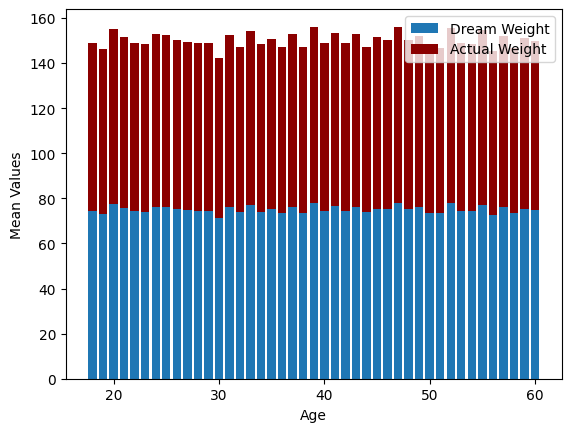

In [27]:
df_numeric = df.select_dtypes(include=[np.number])
plt.bar(df_numeric.groupby(by='Age').mean().index,df_numeric.groupby(by='Age').mean().iloc[:,1],label='Dream Weight')
plt.bar(df_numeric.groupby(by='Age').mean().index,df_numeric.groupby(by='Age').mean().iloc[:,2],color='darkred',label='Actual Weight',bottom=df_numeric.groupby(by='Age').mean().iloc[:,1])
plt.xlabel('Age')
plt.ylabel('Mean Values')
plt.legend()
plt.show()

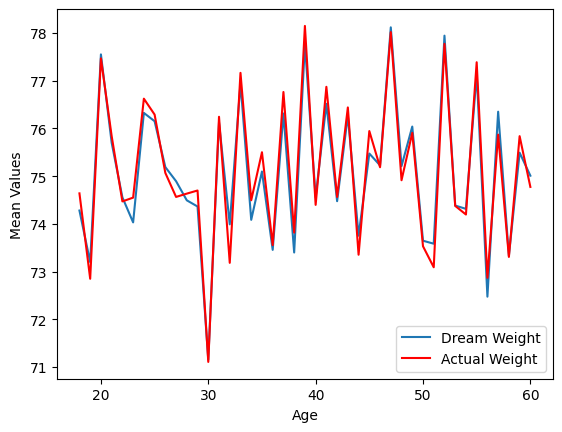

In [28]:
df_numeric = df.select_dtypes(include=[np.number])

plt.plot(df_numeric.groupby(by='Age').mean().index,df_numeric.groupby(by='Age').mean().iloc[:,1],label='Dream Weight')
plt.plot(df_numeric.groupby(by='Age').mean().index,df_numeric.groupby(by='Age').mean().iloc[:,2],color='r',label='Actual Weight')
plt.xlabel('Age')
plt.ylabel('Mean Values')
plt.legend()
plt.show()

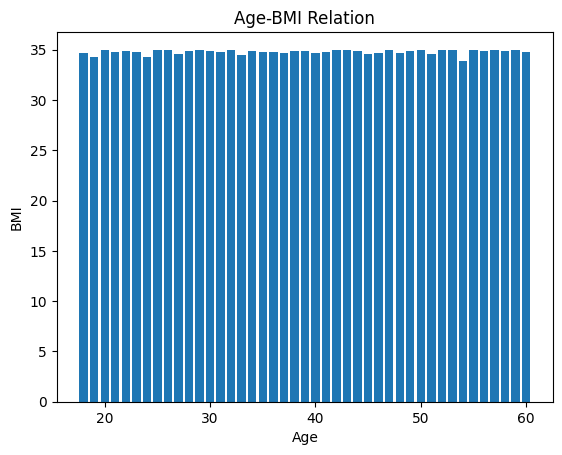

In [29]:
plt.bar(df['Age'].sort_values(),df['BMI'])
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('Age-BMI Relation')
plt.show()

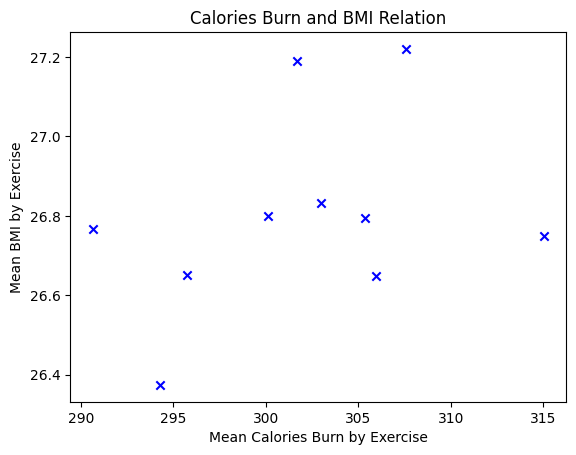

In [30]:
# Grouping by 'Exercise' and calculating the mean for numeric columns
exercise_means = df.groupby(by='Exercise').mean(numeric_only=True)

# Extracting the specific columns for plotting
mean_calories_burn = exercise_means.iloc[:, 0]  # Assuming the first column is Calories Burn
mean_bmi = exercise_means.iloc[:, 6]             # Assuming the seventh column is BMI

# Create the scatter plot
plt.scatter(mean_calories_burn, mean_bmi, color='blue', marker='x')
plt.xlabel("Mean Calories Burn by Exercise")
plt.ylabel("Mean BMI by Exercise")
plt.title('Calories Burn and BMI Relation')
plt.show()


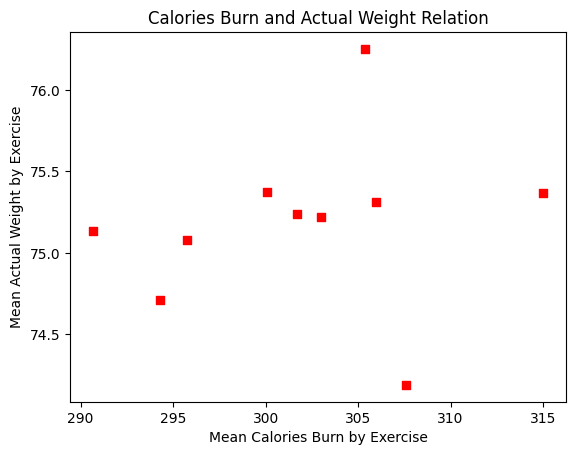

In [31]:
# Grouping by 'Exercise' and calculating the mean for numeric columns only
exercise_means = df.groupby(by='Exercise').mean(numeric_only=True)

# Extracting the specific columns for plotting
mean_calories_burn = exercise_means.iloc[:, 0]  # Assuming the first column is Calories Burn
mean_actual_weight = exercise_means.iloc[:, 2]   # Assuming the third column is Actual Weight

# Create the scatter plot
plt.scatter(mean_calories_burn, mean_actual_weight, color='red', marker='s')
plt.xlabel("Mean Calories Burn by Exercise")
plt.ylabel("Mean Actual Weight by Exercise")
plt.title('Calories Burn and Actual Weight Relation')
plt.show()


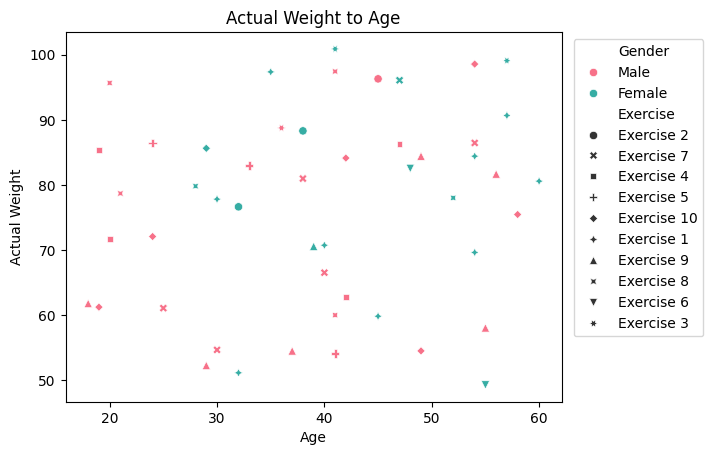

In [32]:
ssp = sns.scatterplot(data=df.head(50),x="Age",y="Actual Weight",hue="Gender",palette="husl",style='Exercise')
plt.title("Actual Weight to Age")
sns.move_legend(ssp,loc="upper left",bbox_to_anchor=(1.01, 1))

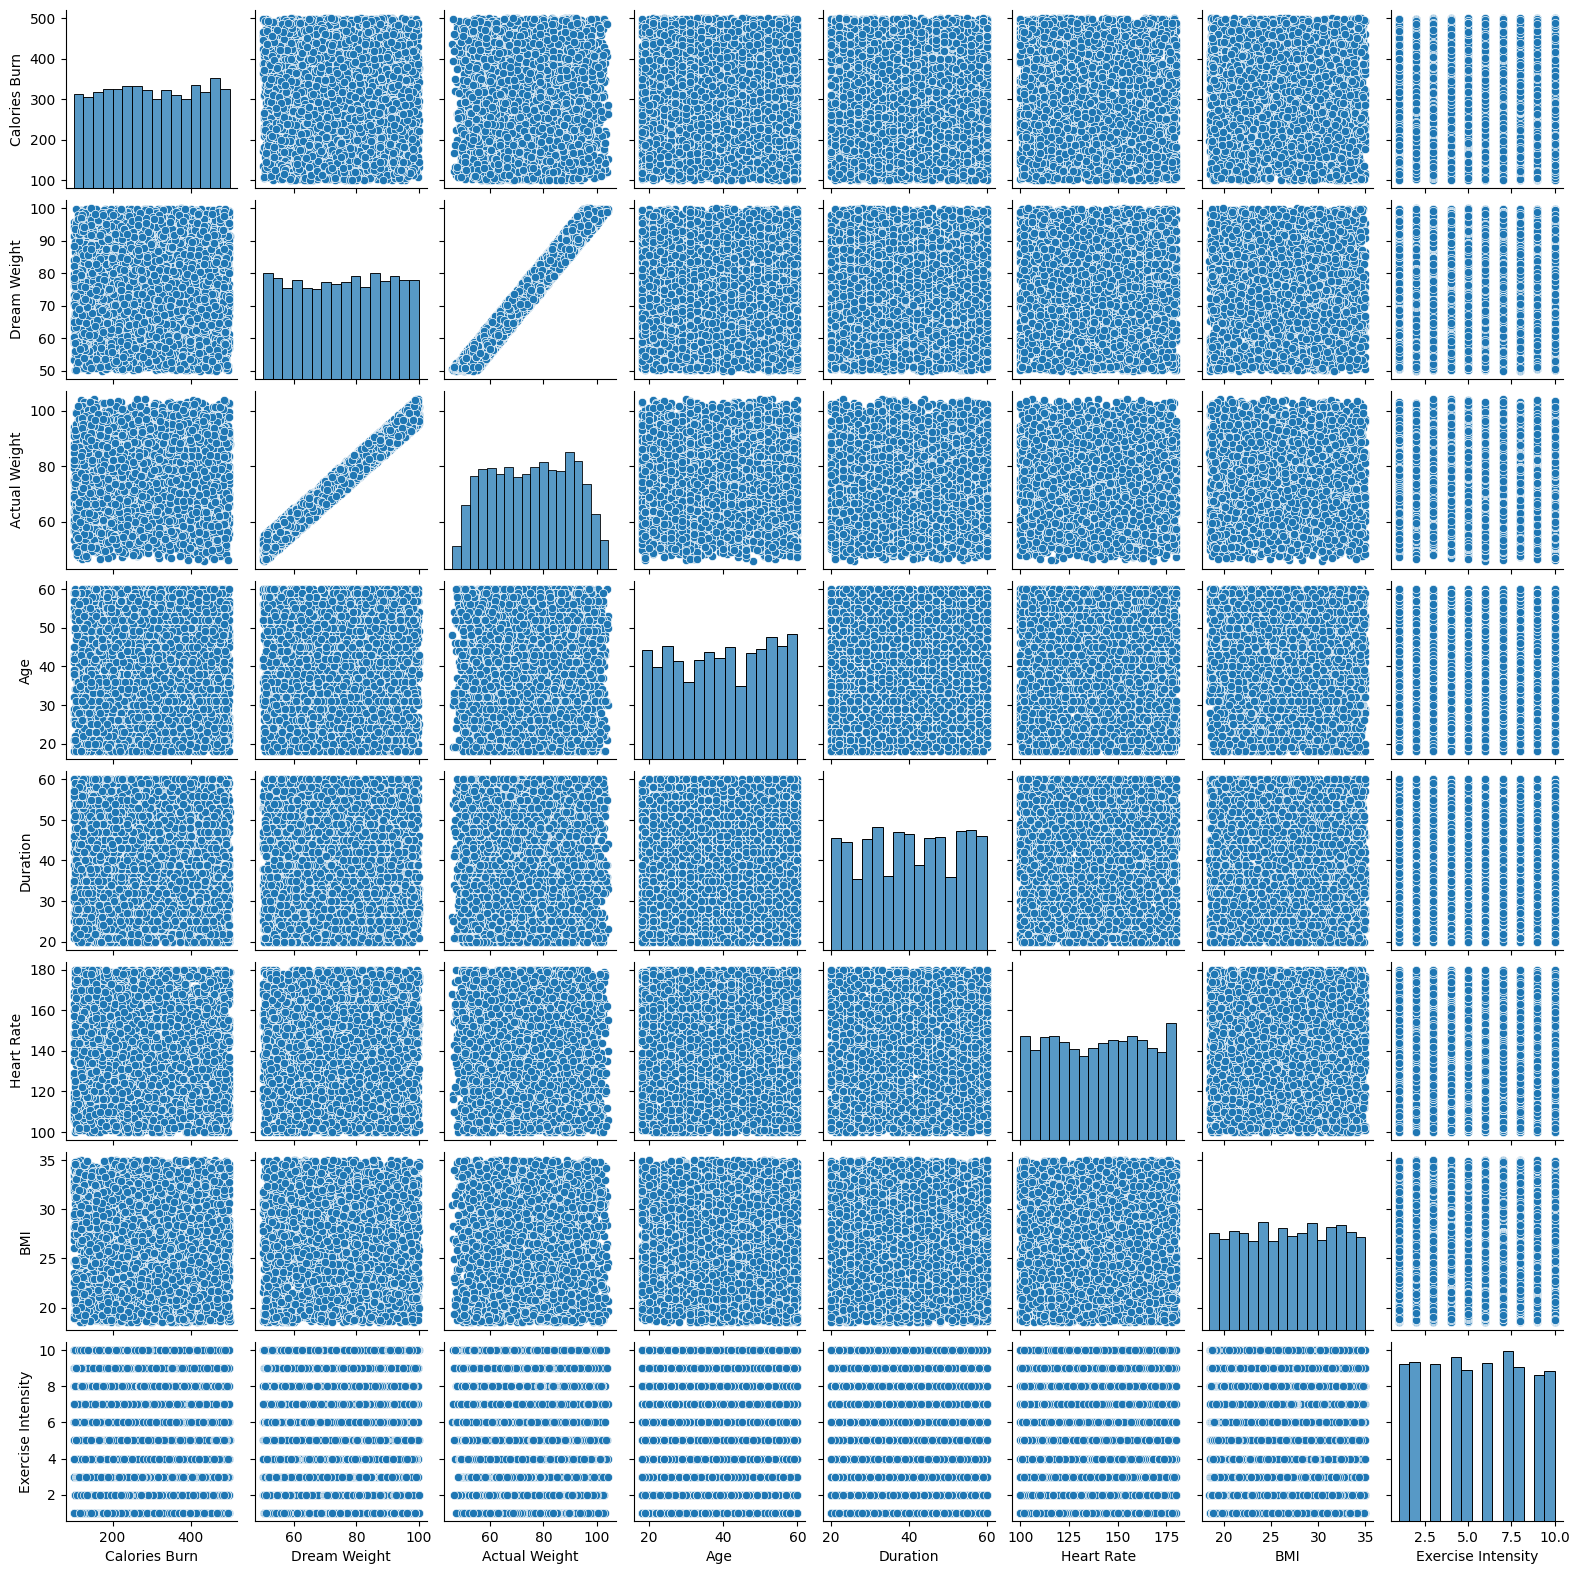

In [33]:
sns.pairplot(data = df, height = 2)

In [34]:
# drop_first=True means to remove the multicollinearity from a dataset.
df1 = pd.get_dummies(df, columns=['Gender', 'Weather', 'Exercise'], drop_first=True)


In [35]:
df1.head()

,Calories Burn,Dream Weight,Actual Weight,Age,Duration,Heart Rate,BMI,Exercise Intensity,Gender_Male,Weather_Rainy,Weather_Sunny,Exercise_Exercise 10,Exercise_Exercise 2,Exercise_Exercise 3,Exercise_Exercise 4,Exercise_Exercise 5,Exercise_Exercise 6,Exercise_Exercise 7,Exercise_Exercise 8,Exercise_Exercise 9
0,286.959851,91.892531,96.301115,45,37,170,29.426275,5,True,True,False,False,True,False,False,False,False,False,False,False
1,343.453036,64.165097,61.104668,25,43,142,21.286346,5,True,True,False,False,False,False,False,False,False,True,False,False
2,261.223465,70.846224,71.766724,20,20,148,27.899592,4,True,False,False,False,False,False,True,False,False,False,False,False
3,127.183858,79.477008,82.984456,33,39,170,33.729552,10,True,False,True,False,False,False,False,True,False,False,False,False
4,416.318374,89.960226,85.643174,29,34,118,23.286113,3,False,False,False,True,False,False,False,False,False,False,False,False


In [36]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3864 entries, 0 to 3863
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Calories Burn         3864 non-null   float64
 1   Dream Weight          3864 non-null   float64
 2   Actual Weight         3864 non-null   float64
 3   Age                   3864 non-null   int64  
 4   Duration              3864 non-null   int64  
 5   Heart Rate            3864 non-null   int64  
 6   BMI                   3864 non-null   float64
 7   Exercise Intensity    3864 non-null   int64  
 8   Gender_Male           3864 non-null   bool   
 9   Weather_Rainy         3864 non-null   bool   
 10  Weather_Sunny         3864 non-null   bool   
 11  Exercise_Exercise 10  3864 non-null   bool   
 12  Exercise_Exercise 2   3864 non-null   bool   
 13  Exercise_Exercise 3   3864 non-null   bool   
 14  Exercise_Exercise 4   3864 non-null   bool   
 15  Exercise_Exercise 5  

# Train and Test

In [37]:
x1 = df1.drop('Actual Weight',axis=1)      # independent features.
y1 = df1['Actual Weight']                  # dependent feature.

In [38]:
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.2,random_state=11)

# Modelling by LinearRegression

In [39]:
reg = LinearRegression()
model = reg.fit(x_train,y_train)

In [41]:
model.intercept_ # we call the constant term. i.e c intercept

0.8891934610071672

In [42]:
model.coef_ #we call independent variables's coefficents. i.e m1, m2 and so on.

array([-7.81233275e-05,  1.00114960e+00, -5.07836710e-03,  2.85523613e-03,
        4.58226529e-04, -2.23414292e-02, -1.22891489e-02, -2.18750448e-02,
       -5.46882094e-02,  5.27212953e-02, -4.06524234e-01, -1.91365411e-01,
       -2.98692608e-01, -2.90810409e-01, -2.14804067e-01,  2.62429914e-02,
       -4.97826631e-02, -3.22675978e-01, -5.02029196e-01])

In [43]:
y_pred = model.predict(x_test)

In [ ]:
y_pred

array([ 51.08855352,  54.83436719,  64.80182168,  75.13552652,
        93.10569307,  61.00142367,  59.26439791,  86.2347614 ,
        67.96855986,  55.0302637 ,  72.49213851,  67.42064338,
        93.81005895,  72.56168671,  95.33070456,  69.50617327,
        70.97301549,  82.12256736,  91.29886542,  73.3722166 ,
        64.1334489 ,  90.93249646,  98.6194724 ,  98.13645824,
        54.34712898,  80.87200287,  81.52961545,  69.90362746,
        92.4421675 ,  68.13540369,  97.07553018,  62.50108175,
        70.13096684,  54.32829541,  70.72458874,  98.14640754,
        98.37551827,  82.62999425,  93.9280875 ,  96.9060533 ,
        54.89333042,  59.42890085,  94.31502708,  70.03630939,
        51.39461817,  54.90736953,  78.06650395,  84.46852429,
        91.29199015,  80.2521367 ,  52.5428528 ,  70.2269812 ,
        73.92250649,  76.8668535 ,  50.9642157 ,  57.01495259,
        96.48608918,  85.47565896,  98.80742793,  51.30544009,
        70.6696206 ,  85.34736715,  78.04506698,  86.64

# Modelling by KNN

In [44]:
from sklearn.metrics import mean_squared_error

In [45]:
mean_squared_error(y_test,y_pred)                        # error for linear regression

7.880133167964356

In [46]:
knn = KNeighborsRegressor(n_neighbors=8)
model2 = knn.fit(x_train,y_train)

In [47]:
y_pred2= model2.predict(x_test)

In [48]:
y_pred2 = model2.predict(x_test)

In [49]:
mean_squared_error(y_test,y_pred2)                      # error for KneighbourRefressor

21.537575790165334

model by decision tree

In [50]:
dt= DecisionTreeRegressor()
model3 = dt.fit(x_train,y_train)


In [51]:
y_pred3= model3.predict(x_test)

In [52]:

print(mean_squared_error(y_test,y_pred3))


17.43285521833855


model by RandomForest

In [53]:
rf= RandomForestRegressor(n_estimators=100)
model4 = rf.fit(x_train,y_train)

In [54]:
y_pred4= model4.predict(x_test)

In [55]:
print(mean_squared_error(y_test,y_pred4))

8.685696515856254


now i am providing the new input data for getting the output variable from the model.

In [58]:

# Define the input data
new_data = {
    'Calories Burn': [250],
    'Dream Weight': [70],
    'Age': [25],
    'Duration': [30],
    'Heart Rate': [110],
    'BMI': [22],
    'Exercise Intensity': [2],
    'Gender_Male': [1],
    'Weather_Rainy': [0],
    'Weather_Sunny': [1],
    'Exercise_Exercise 10': [0],
    'Exercise_Exercise 2': [1],
    'Exercise_Exercise 3': [0],
    'Exercise_Exercise 4': [0],
    'Exercise_Exercise 5': [0],
    'Exercise_Exercise 6': [0],
    'Exercise_Exercise 7': [0],
    'Exercise_Exercise 8': [0],
    'Exercise_Exercise 9': [0],
}

# Convert the new data into a DataFrame
input_df = pd.DataFrame(new_data)

# Reindex the DataFrame to match the columns used during training
# Assuming `feature_names` contains the training column names
feature_names = [
    'Calories Burn', 'Dream Weight', 'Age', 'Duration',
    'Heart Rate', 'BMI', 'Exercise Intensity', 'Gender_Male',
    'Weather_Rainy', 'Weather_Sunny',
    'Exercise_Exercise 10', 'Exercise_Exercise 2',
    'Exercise_Exercise 3', 'Exercise_Exercise 4',
    'Exercise_Exercise 5', 'Exercise_Exercise 6',
    'Exercise_Exercise 7', 'Exercise_Exercise 8',
    'Exercise_Exercise 9'
]

# Ensure that all columns are included in the input DataFrame
input_df = input_df.reindex(columns=feature_names, fill_value=0)

# Make the prediction
predicted_weight = model.predict(input_df)

print("Predicted Actual Weight:", predicted_weight[0])


Predicted Actual Weight: 70.28262855371416
